In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import json
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


%matplotlib inline

In [2]:
path = '/Volumes/GoogleDrive/My Drive/wish_local/DSF-1436 Fusion Incrementality Analysis/'

In [10]:
df = pd.read_csv(path+'data/dsf1436_exp_price_check.csv', parse_dates=['transaction_month', 'cohort'])
df = df.sort_values(['cohort', 'bucket'])
df.head()

,transaction_month,cohort,bucket,shipping_country,num_mid,num_dist_mid,num_fusion_mid,sum_gmv,avg_gmv,sd_gmv,gmv50,avg_price,sd_price,price50,avg_shipping,sd_shipping,shipping50,avg_quantity,sd_quantity,quantity50,sum_fusion_gmv,avg_fusion_gmv,sd_fusion_gmv,avg_fusion_price,sd_fusion_price,avg_fusion_shipping,sd_fusion_shipping,time
35,2020-09-01,2020-01-01,ANDROID_CONTROL,US,1524,1524,0,20899.114722,13.713330,17.733851,7.800000,8.304191,14.543488,3.640000,4.735313,3.793367,4.000000,1.074803,0.339322,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629170609
125,2020-03-01,2020-01-01,ANDROID_CONTROL,CA,767,767,0,8287.257717,10.804769,15.007598,5.164812,5.786716,12.243279,2.105372,4.273639,2.818431,3.479736,1.113429,0.527140,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629170609
213,2020-07-01,2020-01-01,ANDROID_CONTROL,GB,536,536,0,6880.080946,12.835972,14.591234,7.255284,7.493157,11.619491,3.475928,4.987334,3.194976,3.781333,1.046642,0.235924,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629170609
348,2020-12-01,2020-01-01,ANDROID_CONTROL,US,1672,1672,1,16718.372476,9.999027,12.547525,5.780000,5.494802,9.161509,2.790000,4.011031,2.985103,3.000000,1.085526,0.411243,1.0,4.800000,4.800000,0.000000,3.000000,0.000000,1.800,0.000000,1629170609
395,2021-04-01,2020-01-01,ANDROID_CONTROL,FR,530,530,5,6861.670998,12.946549,10.333838,10.710894,7.444794,7.381667,4.805780,4.951743,2.751472,4.787776,1.073585,0.383947,1.0,47.669611,9.533922,4.780332,5.057432,3.913026,2.888,1.021066,1629170609


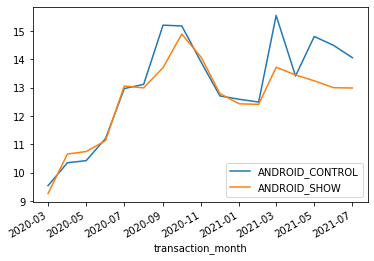

In [46]:
temp = df[(df['shipping_country']=='US') & \
   (df['cohort']==datetime(2020,3,1)) & \
   (df['bucket'].apply(lambda x: 'ANDROID' in x))\
  ].set_index('transaction_month').groupby('bucket')
temp['avg_gmv'].plot()
# temp['avg_fusion_gmv'].plot(label='avg_fusion_gmv')
plt.legend()

In [55]:
temp = df[(df['shipping_country']=='US') & \
   (df['cohort']==datetime(2020,2,1)) & \
   (df['bucket'].apply(lambda x: 'ANDROID_SHOW' in x))\
  ].sort_values(['transaction_month', 'bucket'])


temp['gmv_diff'] =  (temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_gmv']
temp['price_diff'] =  (temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_price']
temp['shipping_diff'] = (temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_shipping']
temp[['transaction_month','bucket','gmv_diff', 'price_diff', 'shipping_diff', 'sum_fusion_gmv']]

,transaction_month,bucket,gmv_diff,price_diff,shipping_diff,sum_fusion_gmv
7588,2020-02-01,ANDROID_SHOW,-0.297875,-0.285448,-0.325562,22307.058781
4986,2020-03-01,ANDROID_SHOW,-0.403167,-0.374765,-0.467305,15594.289339
5234,2020-04-01,ANDROID_SHOW,NaN,NaN,NaN,NaN
7953,2020-05-01,ANDROID_SHOW,-0.286467,-0.298872,-0.440572,2270.300010
5477,2020-06-01,ANDROID_SHOW,-0.394204,-0.362049,-0.458468,12912.190695
4244,2020-07-01,ANDROID_SHOW,-0.327073,-0.270253,-0.449446,26500.410125
3994,2020-08-01,ANDROID_SHOW,-0.405041,-0.368618,-0.503795,21198.050083
5306,2020-09-01,ANDROID_SHOW,-0.372149,-0.302300,-0.482909,17118.340079
3544,2020-10-01,ANDROID_SHOW,-0.377290,-0.321444,-0.498564,23526.138700
7169,2020-11-01,ANDROID_SHOW,-0.321591,-0.268625,-0.431577,28644.550105


In [56]:
temp = df[(df['shipping_country']=='US') & \
   (df['cohort']==datetime(2020,2,1)) & \
   (df['bucket'].apply(lambda x: 'IOS_SHOW' in x))\
  ].sort_values(['transaction_month', 'bucket'])


temp['gmv_diff'] =  (temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_gmv']
temp['price_diff'] =  (temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_price']
temp['shipping_diff'] = (temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_shipping']
temp[['transaction_month','bucket','gmv_diff', 'price_diff', 'shipping_diff', 'sum_fusion_gmv']]

,transaction_month,bucket,gmv_diff,price_diff,shipping_diff,sum_fusion_gmv
3470,2020-02-01,IOS_SHOW,-0.270981,-0.296493,-0.325205,19353.753168
774,2020-03-01,IOS_SHOW,-0.363577,-0.326428,-0.441070,11097.896833
1277,2020-04-01,IOS_SHOW,NaN,NaN,NaN,NaN
4525,2020-05-01,IOS_SHOW,-0.241096,-0.130605,-0.387099,1595.880009
2110,2020-06-01,IOS_SHOW,-0.359046,-0.333632,-0.447101,9340.369914
5450,2020-07-01,IOS_SHOW,-0.338637,-0.285026,-0.448084,20843.030071
79,2020-08-01,IOS_SHOW,-0.359269,-0.334294,-0.463750,15948.570060
37,2020-09-01,IOS_SHOW,-0.376610,-0.346928,-0.472006,14415.710042
1169,2020-10-01,IOS_SHOW,-0.355171,-0.320007,-0.475118,17422.700063
6904,2020-11-01,IOS_SHOW,-0.359106,-0.330599,-0.447442,16581.240048


In [60]:
temp = df[(df['shipping_country']=='US') & \
   (df['cohort']==datetime(2020,2,1)) & \
   (df['bucket'].apply(lambda x: 'IOS_' in x))\
  ].sort_values(['transaction_month', 'bucket'])

temp[['transaction_month','bucket','avg_gmv', 'avg_fusion_gmv', 'avg_price', 'avg_shipping', 'avg_fusion_shipping', 'sum_fusion_gmv']]

,transaction_month,bucket,avg_gmv,avg_fusion_gmv,avg_price,avg_shipping,avg_fusion_shipping,sum_fusion_gmv
4386,2020-02-01,IOS_CONTROL,8.141113,3.997059,5.131100,2.534848,1.515882,67.950000
3470,2020-02-01,IOS_SHOW,8.247180,6.012350,5.192289,2.595649,1.751532,19353.753168
7516,2020-03-01,IOS_CONTROL,9.420181,4.714545,4.872723,3.964332,2.059091,51.860000
774,2020-03-01,IOS_SHOW,9.325094,5.934704,4.845455,3.901799,2.180834,11097.896833
231,2020-04-01,IOS_CONTROL,10.223576,NaN,5.324007,4.290985,NaN,NaN
1277,2020-04-01,IOS_SHOW,10.651341,NaN,5.647513,4.309236,NaN,NaN
4604,2020-05-01,IOS_CONTROL,10.927049,5.680000,5.612969,4.329866,2.680000,11.360000
4525,2020-05-01,IOS_SHOW,10.620574,8.060000,5.746364,4.315709,2.645101,1595.880009
7617,2020-06-01,IOS_CONTROL,11.110297,9.715294,5.974713,4.364820,2.988824,165.159999
2110,2020-06-01,IOS_SHOW,11.124129,7.130053,6.179515,4.345284,2.402504,9340.369914


In [ ]:
metrics:
    1. In show bucket, (avg gmv-avg fusion gmv)/avg gmv trendline
    2. In show bucket, fusion gmv /all gmv trendline
    3. Diff of avg gmv in show and control buckets 

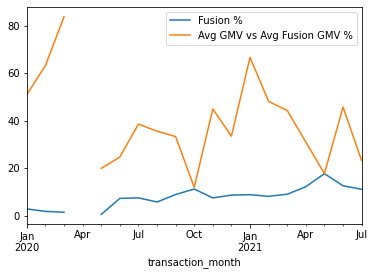

In [83]:
temp = df[(df['shipping_country']=='FR') & \
   (df['cohort']==datetime(2020,1,1)) & \
   (df['bucket'].apply(lambda x: 'IOS_' in x))\
  ].sort_values(['transaction_month', 'bucket'])

temp['fusion_gmv_pct'] = temp['sum_fusion_gmv'] / temp['sum_gmv'] * 100
temp['gmv_diff'] =  -(temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_fusion_gmv'] * 100
temp['price_diff'] =  -(temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_fusion_price']  * 100
temp['shipping_diff'] = -(temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_fusion_shipping'] * 100

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['fusion_gmv_pct'].plot(label='Fusion %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['gmv_diff'].plot(label='Avg GMV vs Avg Fusion GMV %')

plt.legend()

In [ ]:
Quesions
1. Why there is LTV (gmv and order) and rephurchase difference for cohorts of Jan to May 2020? 
    This is observed in DE, US, CL, FR, GB, IT, MX(not as significant)
    1.1 Hypothesis: price/shipping price/TTD of Fusion was no longer attractive to all users.
        That could not be ture, b/c if Fusion was no longer attractive to all users, 
        then the longer term LTV (e.g. 360d of cohort 2020-01) should not be incremental. 
    1.2 Hypothesis: price/shipping price/TTD of Fusion was no longer attractive to NEW users only \
        (but remain attractive to the existing users) after May 2020.
    1.3 Hypothesis: notification (push) / customer service / UI changed after 2020-05, 
        and those changes had different impact on the SHOW and CONTROL buckets. 
    1.4 Hypothesis: the cohorts are genetically different. 
        i.e., the new cohorts were less likely to be attracted by Fusion than the old ones. 
2. Theoretically, the cohort of 2020-04 in US did not see any difference in the first 7d/30d, 
    as they could not see Fusion products. But it is not weird that they had higher LTV after 30d, 
    becuase when they returned, they could see the Fusion products.
    Similarly, there were no Fusion orders between 2020-01 to 2020-09, but the SHOW bucket is incremental in repurchase
    
Observations:
1. In the SHOW bucket, the diff between Fusion gmv/price/shipping and all kinds of orders was becoming larger.
But this does not necessarily mean the Fusion price was becoming lower. 
It just means users chose to buy products w/ lower price via Fusion.